   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

C:\Users\OGHENE-OVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



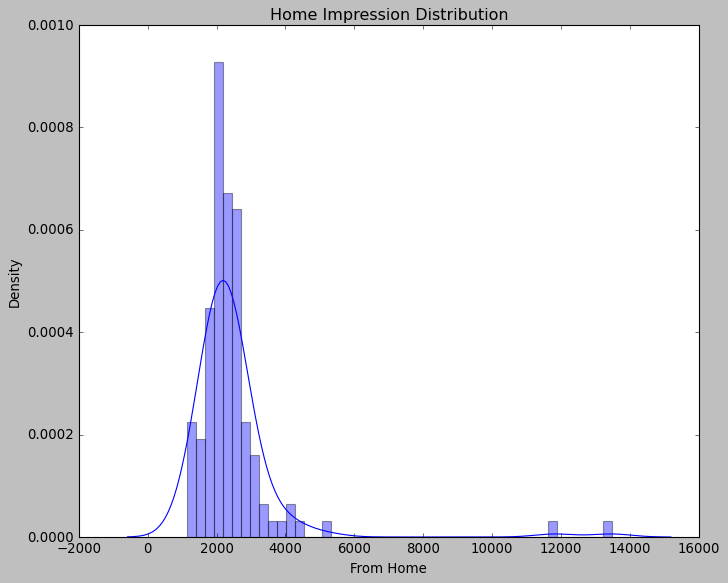

C:\Users\OGHENE-OVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



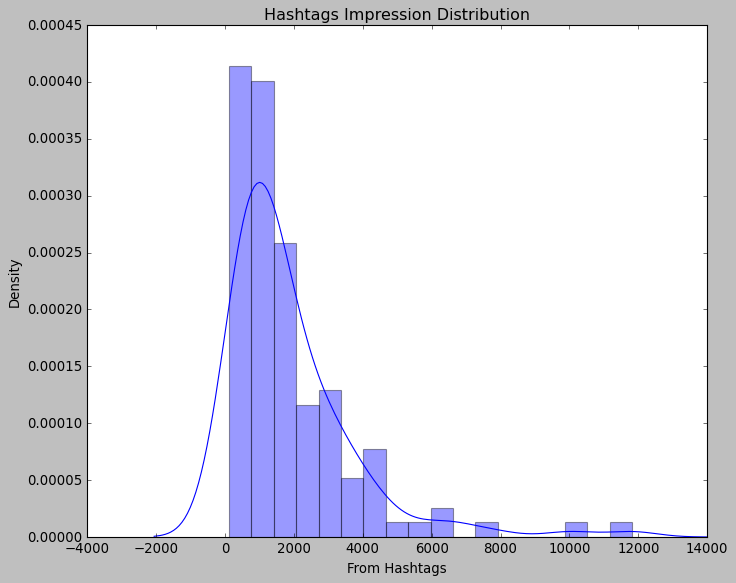

C:\Users\OGHENE-OVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



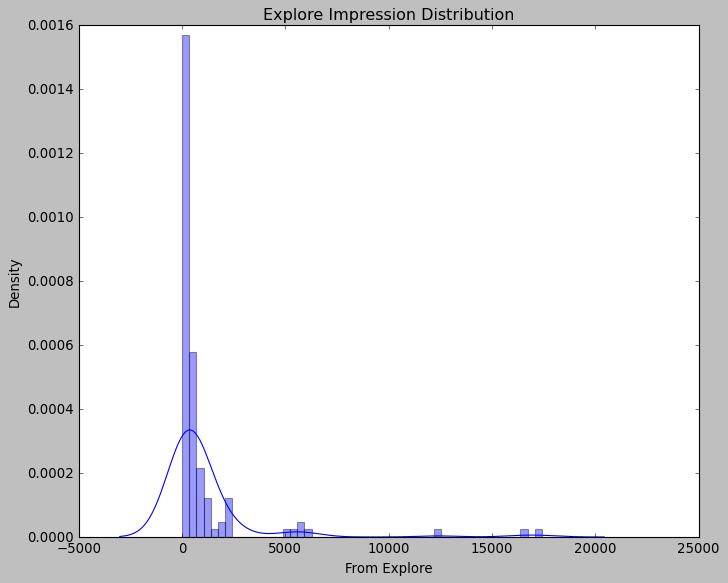

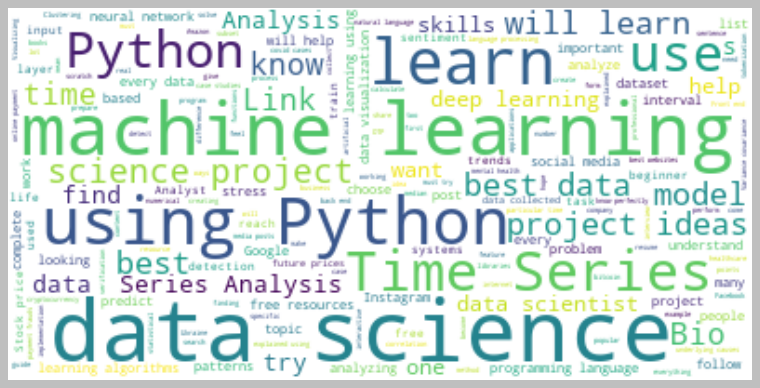

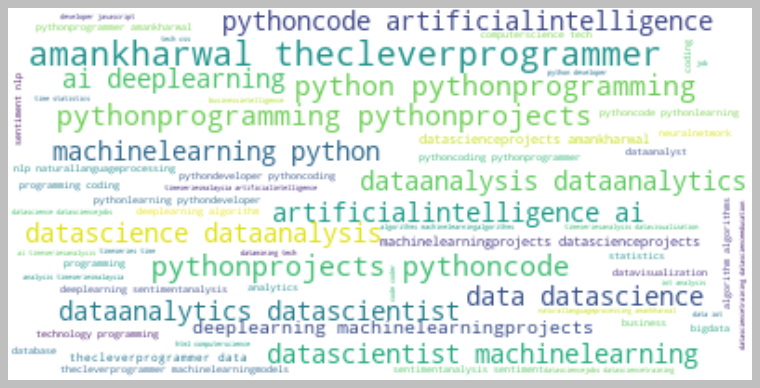

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64
41.00265604249668


In [2]:
#Project start date: 01/01/24
#Project title: Instagram reach analysis project
#Project source:

#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#reading dataset
ig_data = pd.read_csv('Instagram_data.csv', encoding = 'latin1')
print(ig_data.head())
print(ig_data.info())
print(ig_data.describe())

#cleaning the dataset
print(ig_data.isna().sum())
ig_data = ig_data.dropna()

#analyzing instagram posts with plots
plt.figure(figsize=(10, 8))
sns.distplot(ig_data['From Home'])
plt.title("Home Impression Distribution")
plt.show()
#conclusion: From Home, its hard to reach all folowwers daily

plt.figure(figsize=(10, 8))
sns.distplot(ig_data['From Hashtags'])
plt.title("Hashtags Impression Distribution")
plt.show()
#conclusion: From Hashtags, many new users can be reached

plt.figure(figsize=(10, 8))
sns.distplot(ig_data['From Explore'])
plt.title("Explore Impression Distribution")
plt.show()
#conclusion: From Explore, Instagram does not recommend posts much to the users, Hashtags has more reach

home = ig_data["From Home"].sum()
hashtags = ig_data["From Hashtags"].sum()
explore = ig_data["From Explore"].sum()
other = ig_data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(ig_data, values=values, names=labels, 
             title='Instagram post impression from various sources', hole=0.5)
fig.show()
#conclusion: almost 50% reach is from Home(followers), with hashtags leading after that

#analyzing words content from instagram post
text = " ".join(i for i in ig_data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#conclusion: this shows the most used word in the instagram posts

text = " ".join(i for i in ig_data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#conclusion: this shows the most used hashtags in the instagram posts

figure = px.scatter(data_frame = ig_data, x="Impressions", y="Likes",
                    size="Likes", trendline="ols", 
                    title = "Likes and Impressions Relationship")
figure.show()
#the above code analyzed the relationship between number of likes and the number of impressions

figure = px.scatter(data_frame = ig_data, x="Impressions", y="Comments",
                    size="Comments", trendline="ols",
                    title = "Comments and Total Impressions Relationship")
figure.show()
#the above code analyzed the relationship between number of Comments and the number of impressions
#conclusion: comments doesn't affect reach

figure = px.scatter(data_frame = ig_data, x="Impressions", y="Shares",
                    size="Shares", trendline="ols", 
                    title = "Shares and Total Impressions Relationship")
figure.show()
#conclusion: Higher shares is equivalent to higher reach, but higher likes is greater than higher shares

figure = px.scatter(data_frame = ig_data, x="Impressions", y="Saves",
                    size="Saves", trendline="ols", 
                    title = "Post Saves and Total Impressions Relationship")
figure.show()
#conclusion: A linear relationship exist between the number of times post is saved and the reach of Instagram post

#finding ig_data correlation
correlation = ig_data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

#Analyzing Conversion Rate: conversation rate means how many followers you are getting from the number of profile visits from a post
conversion_rate = (ig_data["Follows"].sum() / ig_data["Profile Visits"].sum()) * 100
print(conversion_rate)

#last commit date: 10/01/24
#project completion date: